In [1]:
import sys
import numpy as np
from numpy.random import default_rng
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.keras.models import load_model
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
sys.path.append('..')
plt.style.use('dark_background')
from utils.visuals import *
from utils.data_loader import *
from utils.simpleFunctions import *
from utils.ae import *

In [2]:
data_path = "../data/processed/0_dB_slider.h5"

In [3]:
X = load_normal_data(data_path)
X_train, X_val = train_test_split(X, test_size=0.1, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (23068, 64, 96, 1)
Validation data shape: (2564, 64, 96, 1)


In [ ]:
input_shape = X_train.shape[1:]
model = build_autoencoder_v3(input_shape, "mse")

train_dataset = create_dataset(X_train, batch_size=32)
val_dataset = create_dataset(X_val, batch_size=32, shuffle=False)

callbacks = get_training_callbacks("../results/models/slider/0dB/0dB_ae_v3_mse_best32.h5")

history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=callbacks)

Epoch 1/50
311/721 [===========>..................] - ETA: 13s - loss: 0.0040  

In [ ]:
plot_loss_curve(history)

In [34]:
# model.save("../results/models/unet_v1_mse_final.h5")
# model = load_model("../results/models/pump/-6dB/-6dB_ae_v1_bce_best.h5")

In [35]:
eval_dataset, X_eval_bal, y_eval_bal, filenames_bal = prepare_balanced_eval_dataset(data_path)

Evaluation data shape: (7296, 64, 96, 1)
Balanced label distribution: Counter({0: 3648, 1: 3648})
Full label distribution: Counter({0: 29992, 1: 3648})


In [36]:
X_pred = model.predict(eval_dataset, verbose=1)
errors_mse = compute_mse_batchwise(X_eval_bal, X_pred)

114/114 [==============================] - 2s 19ms/step


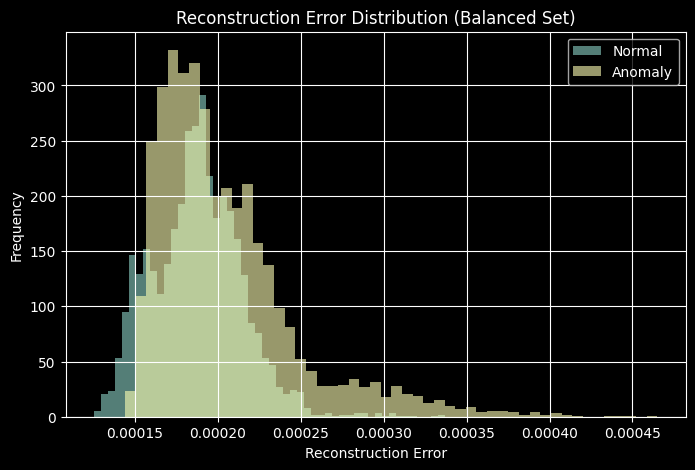

In [37]:
plot_error_histogram(errors_mse, y_eval_bal)

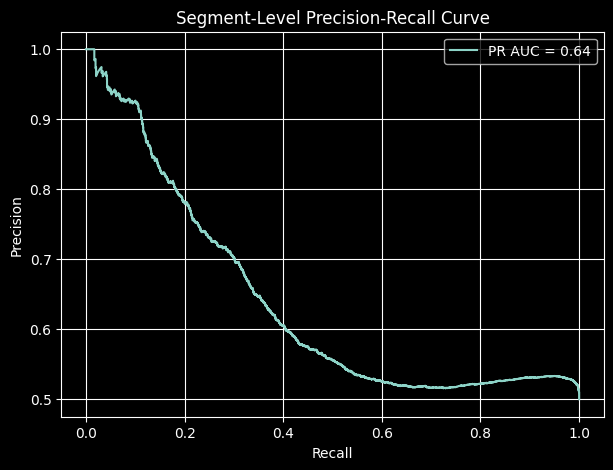

In [38]:
auc_segment = plot_segment_level_pr_curve(errors_mse, y_eval_bal)

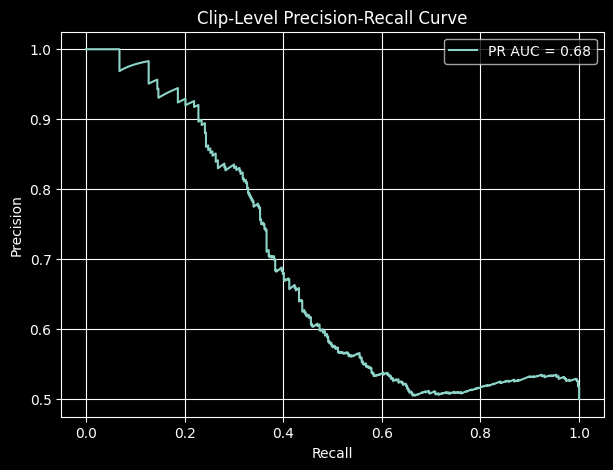

In [39]:
auc_clip = plot_clip_level_pr_curve(errors_mse, y_eval_bal, filenames_bal)